<h1> Assignment 2</h1>
<ul>
<p>General Info:</p>
<ul>
    <li>**Hand-In Date**: 14th MARCH 2019, by 16:00 </li>
    <li>**Hand-In Format**: Submitted to eClass, as notebook AND as exported PDF. Prefered naming convention being (studentid_A2.type). Let us save trees! </li>
    <li>**Late Hand-In Penalty**: -10% of your points per late-day</li>  
    </ul>
    
    
<h2>Topics Covered: </h2>
<ul>
    This assignment covers two metaheuristic algorithms, GA and DE in the context of NP hard problems, with the traveling salesman as example. <br>
It requires basic understanding of Python (syntax, functions and classes functionalities), Random Search, Exhaustive Search, Genetic Algorithms and Differential Evolution Algorithms. <br>
    This assignment will compare your implementation of the Genetic Algorithm and the Differential Evolution Algorithm to Random Search and Exhaustive Search, based on walltime, iteration budget and achieved results as measures.
</ul>

<h2>Marking Table: </h2>
<ul>
    The assignment has 100 marks and 20 bonus points. <br>
    Again, roughly one third of the points can be done without any programming. <br>
    This time, the bonus is a little more involved and requires understanding of the topic. <br>
    We STILL encourage you to plot convergence curves and other helpful data to make your analysis easier! <br>
    
<h3>Task 1 (30): </h3>
<ul>
    <li> **(5+5)**: Explanation & Implementation of *Exhaustive Search* on the provided traveling salesman class. <br>
    <li> **(5+5)**: Explanation & Implementation of *Random Search* on the provided traveling salesman class. <br>
    <li> **(5+5)**: *Comparison* of those two search methods based on walltime, number of iterations and quality of results. *Explain* why the two other methods used in Assignment 1 cannot be applied for this problem. <br>
    </ul>
            
<h3>Task 2 (30): </h3>
<ul>
    <li> **(13)**: *Explaining* Genetic Algorithm with pseudocode, and delivering a pre-implementation asessment (tunable hyperparameters to consider, expected performance issues). <br>
    <li> **(12)**: *Implementing* the Genetic Algorithm in Python. <br>
    <li> **(BONUS 10)**: *Tune* your Genetic Algorithm (for example with hyperparameter & code adjustments) to achieve better results based on the established measures. *The 10 point standard will be the top performances of the class.* <br>
    </ul>

<h3>Task 3 (30): </h3>
<ul>
    <li> **(13)**: *Explaining* Differential Evolution Algorithm with pseudocode, and delivering a pre-implementation asessment (tunable hyperparameters to consider, expected performance issues). <br>
    <li> **(12)**: *Implementing* the Differential Evolution Algorithm in Python. <br>
    <li> **(BONUS 10)**: *Tune* your Differential Evolution AlgorithmGenetic Algorithm (for example with hyperparameter & code adjustments) to achieve better results based on the established measures. *The 10 point standard will be the top performances of the class.* <br>
    </ul>
    
<h3>Task 4 (20): </h3>
<ul>
    <li> **(20)** Comparing GA and DE performance to Exhaustive Search and Random Search with regards to walltime, iteration efficiency, stability, result quality, ease of implementation. <br>
        </ul>
</ul>
   
    
<h2> Python Help: </h2>
<ul>
<li> Measuring Execution time in Python: <url> https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution </url> <br>
</ul>


<h2> Task 0 / Preparation: </h2>
<ul>
    Read and run the cell below to initialize the traveling salesman (TS) class. Read and run the followup cell to see an illustrative example of it’s use. <br>
    
<h3> Rules: </h3>
<ul>
<li> **Travel in a loop:** The salesman travels in a loop. A loop of length X refers to a tour of X cities, where the salesman returns to the original city after visiting the last (a closed loop). <br>
    Example: for a loop of length four, the itinerary might look as follows [1, 2, 3, 4]. But, in reality, the class calculates the length with return to 1. <br>
<li> **No revisits:** Our salesman only visits each city once in a loop - *NOT [1, 2, 1, 2, 1]*! The class does not check for this itself, however. You have to make sure that this is obeyed.
    <li> **Grading:** algorithm performance should be tested for a loop of 6 cities, with 50 cities available. This does not mean, that the algorithms have to be tested on a problem of this scale, however ;-) <br>
</ul>

<h3> Functions: </h3>
<ul>
<li> initializing the TS creates a world with a given number of cities and resets the random seed. <br>
<li> random_tour creates a random tour in the world with a given number of stops. <br>
<li> new_tour creates a new tour, the inputs have to be the respective city numbers in a list of integers! <br>
<li> tour_length calculates the length of the currently planned tour with return to the initial starting point. <br>
<li> plot plots the city positions and the current tour.
    
</ul>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
class traveling_salesman():
    def __init__(self, num_cities=50):
        # initialize the position of the cities
        random.seed(42)
        gridsize=100
        self.num_cities = num_cities
        self.cities = [random.sample(range(gridsize), 2) for x in range(self.num_cities)]

    def random_tour(self, num_stops=6):
        # take a random tour of a given length
        self.num_stops = num_stops
        self.tour = random.sample(range(self.num_cities), self.num_stops)
        return self.tour
        
    def new_tour(self, tour):
        # define a new tour
        tour = [int(_) for _ in tour]
        self.num_stops = len(tour)
        self.tour = tour
    
    def tour_length(self):
        # calculate tour length
        visited_cities = [self.cities[_] for _ in self.tour]
        for city in visited_cities:
            if city == visited_cities[0]:
                #start tour at the start
                traveled_distance = 0
                location = city
            else:
                # each travelled leg
                traveled_distance += np.sqrt((location[0] - city[0])**2 + (location[1] - city[1])**2)
                location = city
        # return to start
        traveled_distance += np.sqrt((visited_cities[0][0] - city[0])**2 + (visited_cities[0][1] - city[1])**2)
        return traveled_distance    

    def plot(self, tour=None):
        #plot the tour if you want to
        if tour is not None:
            self.tour = tour
        plt.plot([self.cities[_][0] for _ in range(self.num_cities)],
                 [self.cities[_][1] for _ in range(self.num_cities)],
                 linestyle='',
                 marker='*',
                markersize=11.0,
                color=[1,0,0])
        plt.plot([self.cities[self.tour[_ % self.num_stops]][0] for _ in range(self.num_cities)],
                 [self.cities[self.tour[_ % self.num_stops]][1] for _ in range(self.num_cities)],
                 'xb-')
        plt.show()

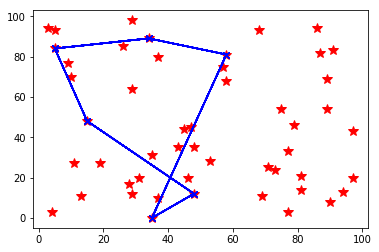

length of first tour:  242.81958814634694


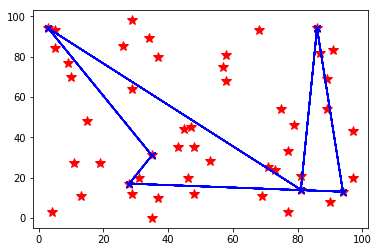

length of first tour:  425.71676264709566


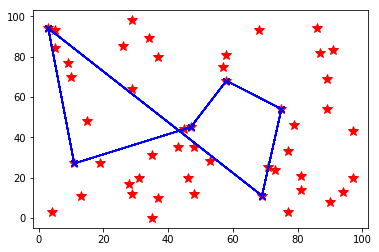

length of first tour:  304.70198936448594


In [2]:
salesman = traveling_salesman(num_cities=50) # initialize the TS's world with 50 cities

random_initial_tour = salesman.random_tour(num_stops=6) # create a random tour for the TS, plot and calculate length of tour
salesman.plot()
print("length of first tour: ", salesman.tour_length())

salesman.new_tour(tour = np.arange(6).tolist()) # assign a new tour to the TS, plot and calculate length
salesman.plot()
print("length of first tour: ", salesman.tour_length())

salesman.new_tour(tour = [1, 6, 7, 28, 42, 9]) # assign a new tour to the TS, plot and calculate length
salesman.plot()
print("length of first tour: ", salesman.tour_length())

<h2> Task 1: Benchmarks </h2>
In this task you will implement two benchmarks, which will be used for the rest of the assignment, Exhaustive Search and Random Search. You will then compare the two methods.
    <h3> T1Q1 (5+5): </h3> 
    <ul>
    **Explain** what exhaustive search is and what advantages and disatvantages it would have to use it on the Traveling Salesman.<br>
    **Implement** an exhaustive search to find the absolute cheapest 6 station loop for a traveling salesman with 50 available cities. Log iteration time, walltime and result! <br>
    ** (approx. 50 words) ** <br>
    **Tip:** Depending on implementation, this might take a while. It might be smart to start with a more restricted problem to test. <br>
    </ul>


*__T1_Q1__* <br/>
<li>What exhaustive search is and what advantages and disatvantages it would have to use it on the Traveling Salesman. <br/>
<ul>Exhausted search is a method that calculate every possible value in a search space. When the search space is really large, it might takes a lot of time(disatvantages). However, we will find the exact best value for our problem(advantages).<br/>For this traveling salesman problem, I'm using "itertools" in python package to help me generate every possible combination in this problem's search space.
</ul>

--- 193118.9248740673 seconds ---
Exhausted algorithm exact minimum route:  [3, 38, 37, 24, 41, 49]
Exhausted algorithm minumum distance = 52.014423


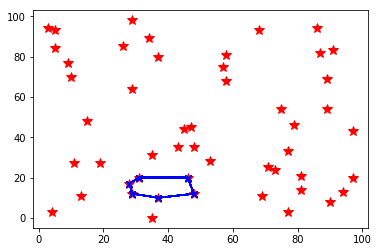

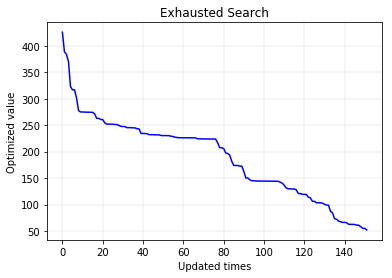

In [3]:
#Code for T1Q1
import itertools
import time

start_time = time.time()
iter_bestvalue = []
num_cities = 50
num_stops = 6
exact_minimum = 10000
mini_route = []
exhasted_salesman = traveling_salesman(num_cities)

cities = np.arange(num_cities)
all_combinations = itertools.combinations(cities, num_stops)
combinations_array = np.array(list(all_combinations))

for i in range(combinations_array.shape[0]):
    all_routes = itertools.permutations(combinations_array[i], num_stops)
    routes_array = np.array(list(all_routes))
    
    for j in range(routes_array.shape[0]):
        salesman.new_tour(tour = routes_array[j]) 
        length = salesman.tour_length()
        
        if length < exact_minimum:
            exact_minimum = length
            mini_route = list(routes_array[j])
            iter_bestvalue.append(exact_minimum)
            
print("--- %s seconds ---" % (time.time() - start_time))
print("Exhausted algorithm exact minimum route: ", mini_route)
print("Exhausted algorithm minumum distance = %f" % (exact_minimum))

salesman.new_tour(tour = mini_route) 
salesman.plot()

plt.plot(iter_bestvalue, color = 'b')
plt.title('Exhausted Search')
plt.xlabel('Updated times')
plt.ylabel('Optimized value')
plt.grid(linewidth = "0.2")


<h3> T1Q2 (5+5): </h3> 
<ul>
**Explain** what Random Search is and what advantages and disatvantages it would have to use it on the Traveling Salesman. <br>
**Implement** an Random Search to find a solution within the best 95% of possible solutions for a 6 city loop for a traveling salesman with 50 available cities. Log iteration time, walltime and result! Explain the tuning process. <br>
 ** (approx. 50 words) ** <br>
</ul>

*__T1_Q2__* <br/>
<li> What Random Search is and what advantages and disatvantages it would have to use it on the Traveling Salesman.  <br/>
<ul>Random search is a simple method that "randomly" generate possible solutions in search space and we will not have any information before these random guesses. And then, find the best value from these random guesses. The advantages for random search is that we can avoid the local minimum through ramdom sampling. The disatvantage is that it's unstable for the results, only if we are really lucky, we will get a pretty good answer with little samples, otherwise, it still takes time to calculate an amount of samples.<br/>
</ul>

--- 246.68409395217896 seconds ---
Random algorithm minimum route:  [37, 24, 41, 3, 49, 38]
Random algorithm minumum distance = 58.409902


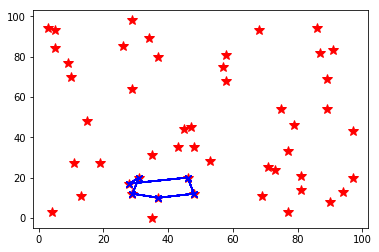

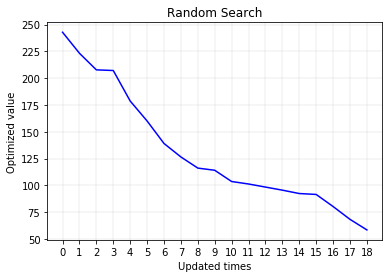

In [7]:
#Code for T1Q2
import time

start_time = time.time()
random_num = np.power(10, 7)
random_minumum = 10000
random_length = 0
random_bestvalue = []

salesman = traveling_salesman(num_cities=50)

for i in range(random_num):
    random_tour = salesman.random_tour(num_stops=6)
    random_length = salesman.tour_length()
    
    if (random_length < random_minumum):
        random_minumum = random_length
        random_min_tour = random_tour
        random_bestvalue.append(random_minumum)

print("--- %s seconds ---" % (time.time() - start_time))

print("Random algorithm minimum route: ", random_min_tour)
print("Random algorithm minumum distance = %f" % (random_minumum))
salesman.new_tour(tour = random_min_tour) 
salesman.plot()

plt.plot(random_bestvalue, color = 'b')
plt.title('Random Search')
plt.xlabel('Updated times')
plt.ylabel('Optimized value')
my_x_ticks = np.arange(0, 19, 1)
plt.xticks(my_x_ticks)
plt.grid(linewidth = "0.2")

<h3> T1Q3 (5+5): </h3> 
<ul>
**Compare** the two search methods based on the required logged variables, and any additional logs you implemented. <br>
    Be sure to use the same initialization of salesman for this comparison. <br>
    **Explain** why the two other search methods from assignment one cannot be applied here. <br>
    **(approx. 100 words)** <br>

*__T1_Q3__* <br/>
<li>(1) **Compare** the two search methods based on the required logged variables, and any additional logs you implemented. <br/>
<ul>First of all, random search takes 193118 seconds(it's 2 days and 5 hours!). It's not suprising that it takes so long, because I'm using the stupidest  method for random search. I'm searching for "every" possible 6-cities combination out of 50 cities, that is a total of 11,441,304,000 routes! Although it takes time, but we still get the exact best route for this problem. However, there should be some smarter way to do this, ex. route [1,2,3,4,5,6,1] is same as route[2,3,4,5,6,1,2], route[3,4,5,6,1,2.3], if I delete the same route, it will take less time to do a random search. On the other hand, it just goes pretty well for random search using random guess, and it's also not that time consuming(compared to exhausted search). However, random search is not stable, sometimes we can get a pretty good result with "less guessing times", but not all the time.<br/>
</ul>
<li>(2) Explain** why the two other search methods from assignment one cannot be applied here. <br/>
<ul>The salesman problem is a discrete space problem. However, the problems solved by gradient descent or Newton method should have a continues space problem. The reason is that we need to calculate the derivative (first or second order) in GD method or Newton method, so we cannot use this two in TSP problem.<br/>
</ul>

<h2> Task 2: Genetic Algorithm </h2>
In this task, you will explain and implement a Genetic Algorithm. You will assess the expected performance of this algorithm compared to the benchmarks.
    <h3> T2Q1 (13): </h3>
    <ul>
    **Explain** how a Genetic Algorithm works and indicate how you plan to go about implementing it. <br>
    Assess the expected performance in terms of walltime and iteration number for the desired results (minimum top 95th percentile). <br>
    **(approx. 100 words)**

*__T2_Q1__* <br/>
<li>**Explain** how a Genetic Algorithm works and indicate how you plan to go about implementing it.<br/>
<ul>The genetic algorithm is a method that imitates the genetics of biological genes.<br/>
(1) Generate a population pool:
<ul>This part is for the first population of gene. The population size: 20~100.<br/>
</ul>
(2) Crossover: 
<ul>The crossover part is to produce the offsprings through chosen parents. In the code, I'll use the fitness function to calculate the probability for each gene to choose parents. The amount for chosen parents is decided by "probability of performing crossover, pc = 0.6~0.9".<br/>
</ul>
(3) Mutation:
<ul>For each offspring, randomly generate a number between [0, 1), if the random number smaller than the value "probability of mutation, pm", then randomly choose two genes and switch their position. "Pm" is a value usually between 0.005~0.05.<br/>
</ul>
<ul>(4) Reapeat (1)~(3) until reach the maximum iteration times.<br/>
</ul>
<br/>
In the code, I planning to create a genetic algorithm function class that includes parent choosing, crossover and mutation parts. After the whole process, print out the time, minimum route, minimum distance, and plot the minimum distance. The strategy I'm using is to find the minimum distance for 50 cities first, and then divided the this minimum rouote into several 6-city route. For example, finding 5 cites out of 10 cities. If the minimum route for 10 cities is [2, 6, 7, 3, 9, 1, 4, 0, 5, 8], and then slice this route to [2, 6, 7, 3, 9], [6, 7, 3, 9, 1], [7, 3, 9, 1, 4]...etc, check every possible sub-routes. Also, this is the reason why I will not print out the minum distance(as above) for 6 cities, because I'm finding the the minimum distance for  50 cities first and then find the 6-city route through this min 50-city route.

<h3> T2Q2 (12): </h3>
<ul>
**Implement** the Genetic Algorithm in Python Code. <br>
Marks are rewarded for code functionality and readability (consistent and useful naming, comments, code formatting). <br>
Log iteration time, walltime and results. <br>
</ul>

<h3> Bonus (10): </h3>
<ul>
**Tune** the Genetic Algorithm to achieve as efficient results as possible. <br>
To do this you can adjust hyperparameters, alter the search in minor ways and improve code efficiency. <br>
The points will be awarded in context to your other colleagues’ improvements. <br>
</ul>


--- 13.823676824569702 seconds ---
The best route of 6 cities:  [0, 11, 6, 12, 33, 47]
The minimum distance of 6 cities:  54.94061575625266


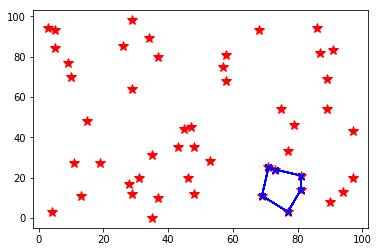

In [22]:
# Code for T2Q2
import time

class genetic_algorithm():
    def __init__(self, mating_pool, population_size, stops):
        self.mating_pool = mating_pool
        self.stops = stops
        self.population_size = population_size
        self.fitness = np.zeros(len(mating_pool))
        self.probability = np.zeros(len(mating_pool))
        self.pc = 0.0     # Probability of performing crossover, pc = 0.6~1.0
        self.pm = 0.05     # pm = 0.005~0.05
    
    # This "random_pick func" is for random selection according to different probability using after calculate fitness funtion
    def random_pick(self, some_list, probabilities):
        random.seed(time.time())
        x = random.uniform(0, 1)
        cumulative_probability = 0.0
        for item, item_probability in zip(some_list,probabilities):
            cumulative_probability += item_probability
            if x < cumulative_probability: break
        return (item)
    
    def parent_choose(self, distance):
        self.distance = distance
        pro_denominator = 0
        counter = 0
        new_pop_list = []
        select_population = np.zeros((1, self.stops))
        pop_index = list(range(0, self.population_size))
        
        # Fitness function
        for i in range(self.population_size):
            self.fitness[i] = 1/self.distance[i]
            pro_denominator = pro_denominator + self.fitness[i]
        
        self.pc = round(random.uniform(0.6, 1.0), 1)     # Randomly pick a num for "probability of performing crossover", pc = 0.6~1.0
        
        for j in range(self.population_size):     # Probability is the reciprocal of fitness function divided by the sum of fitness function
            self.probability[j] = self.fitness[j]/pro_denominator
        
        while (counter < self.pc*self.population_size):     # "self.pc*self.population_size" is the amount of chosen parents(population)
            # Random pick a route(depends on different probability)
            index = self.random_pick(pop_index, self.probability)
            if (index not in new_pop_list):   # Add the chosen route to the cosen population
                new_pop_list.append(index)
                select_pop = self.mating_pool[index]
                select_population = np.row_stack((select_population, select_pop[None, :]))
                counter+=1
        select_population = np.delete(select_population, 0, axis=0)
        return (select_population)
    
    # Produce offspring through chosen parents
    def crossover(self, select_p):
        new_mating_pool = np.zeros((1, self.stops))
        count = 0
        while (count < select_p.shape[0]):     # For each pair in chosen parents, do crossover to produce 2 offsprings
            random.seed(time.time())
            choose = random.randint(0, self.stops)
            parent_A = select_p[count]
            parent_B = select_p[count+1]
            
            # For each parents, this is the first offspring
            gene_a1 = parent_A[: choose]
            gene_a2 = [x for x in parent_B if x not in gene_a1]
            childA = np.concatenate((gene_a1, gene_a2), axis=0)
            new_mating_pool = np.row_stack((new_mating_pool, childA[None, :]))
            
            # For each parents, this is the second offspring
            gene_b1 = parent_B[: choose]
            gene_b2 = [x for x in parent_A if x not in gene_b1]
            childB = np.concatenate((gene_b1, gene_b2), axis=0)
            new_mating_pool = np.row_stack((new_mating_pool, childB[None, :]))
            
            count+=2     # Next pair of parents
        new_mating_pool = np.delete(new_mating_pool, 0, axis=0)
        return (new_mating_pool)
    
    def mutation(self, pool):
        for i in range(pool.shape[0]):
            random.seed(time.time())
            random_num = random.random()
            
            if (random_num < self.pm):
                mutate_1 = random.randint(0, self.stops-1)
                while True:
                    mutate_2 = random.randint(0, self.stops-1)
                    if mutate_1 != mutate_2:
                        break
                temp_gene = pool[i]
                temp1 = temp_gene[mutate_1]
                temp_gene[mutate_1] = temp_gene[mutate_2]
                temp_gene[mutate_2] = temp1
                pool[i] = temp_gene
        return (pool)
    
    def new_population(self, pre_pool):
        new_pool = pre_pool
        num = self.population_size - pre_pool.shape[0]
        for i in range(num):
            index = np.argmin(self.distance)
            new_pool = np.row_stack((new_pool, self.mating_pool[index]))
            np.delete(self.distance, index)
        return (new_pool)

# Main function (time start)
start_time = time.time()

num_cities = 50
pop_size = 20
num_stops = 50
iterations = 2000

# Initialize salesman problem
salesman = traveling_salesman(num_cities) # initialize the TS's world with 50 cities
# Initialize population, distance
mating_pool = np.zeros((pop_size, num_stops))
distance = np.zeros(pop_size)

# Randomly generate a numbers of routes, calculate their distance
for i in range(pop_size):
    mating_pool[i] = salesman.random_tour(num_stops)
    distance[i] = salesman.tour_length()

for i in range(iterations):
    genetic_alg = genetic_algorithm(mating_pool, pop_size, num_stops)
    # Select parents
    selected_population = genetic_alg.parent_choose(distance)
    # Crossover
    mating_pool = genetic_alg.crossover(selected_population)
    # Mutation
    mating_pool = genetic_alg.mutation(mating_pool)

    if (mating_pool.shape[0] < pop_size):
        mating_pool = genetic_alg.new_population(mating_pool)

    for i in range(pop_size):
        salesman.new_tour(tour = mating_pool[i])
        distance[i] = salesman.tour_length()

# Find the minimized 50-city route in whole population
min_index = np.argmin(distance)
min_route_50 = mating_pool[min_index]
min_dis_6 = 1000

# Check every 6-city route in minimized 50-city route
for i in range(num_stops-6):
    route_6 = min_route_50[i: i+6]
    salesman.new_tour(tour = route_6)
    dis_6 = salesman.tour_length()
    
    if (dis_6 < min_dis_6):
        min_dis_6 = dis_6
        min_route_6 = min_route_50[i: i+6]

print("--- %s seconds ---" % (time.time() - start_time))
        
salesman.new_tour(tour = min_route_6) 
min_route_6 = list(map(int, min_route_6))
print("The best route of 6 cities: ", min_route_6)
print("The minimum distance of 6 cities: ", min_dis_6)
salesman.plot()

*__Tuning process for Genetic algorithm__*<br/>
<ul>(1) Decide the population size:<br/>
Population size is tested from 20 to 80. Here is the table of different testing size. It is obvious that large size of population takes more time. Thus, 20 is a enough number for a good result.<br/>
</ul>
<table>
<tr>
<th>pop size</th>
<th>time</th>
<th>min value</th>
</tr>
<tr>
<td bgcolor=orange>20</td>
<td bgcolor=orange>64s</td>
<td bgcolor=orange>54</td>
</tr>
<tr>
<td>40</td>
<td>133s</td>
<td>54</td>
</tr>
<tr>
<td>60</td>
<td>200s</td>
<td>58</td>
</tr>
<tr>
<td>80</td>
<td>275s</td>
<td>57</td>
</tr>
</table>
<ul>(2) Decide pm value: The probabiblty of having the mutation is decided by pm value. This value is usually around 0.005~0.05, thus tuning this value to see if we get good result or not.
</ul>
<table>
<tr>
<th>pm value</th>
<th>time</th>
<th>min value</th>
</tr>
<tr>
<td>0.005</td>
<td>65s</td>
<td>87</td>
</tr>
<tr>
<td>0.01</td>
<td>63s</td>
<td>62</td>
</tr>
<tr>
<td>0.03</td>
<td>66s</td>
<td>58</td>
</tr>
<tr>
<td bgcolor=orange>0.05</td>
<td bgcolor=orange>64s</td>
<td bgcolor=orange>54</td>
</tr>
</table>
<ul>(3) Change the iteration number:
</ul>
<table>
<tr>
<th>iterations</th>
<th>time</th>
<th>min value</th>
</tr>
<tr>
<td>1000</td>
<td>6.7s</td>
<td>71</td>
</tr>
<tr>
<td bgcolor=orange>2000</td>
<td bgcolor=orange>13s</td>
<td bgcolor=orange>54</td>
</tr>
<tr>
<td>5000</td>
<td>33s</td>
<td>58</td>
</tr>
<tr>
<td>10000</td>
<td>64s</td>
<td>54</td>
</tr>
</table>
<ul>(4) Conclusion: population size = 20, pm = 0.05, iterations = 2000

<h2> Task 3: Differential Evolution </h2>
In this task, you will explain and implement a Differential Evolution Algorithm. You will assess the expected performance of this algorithm compared to the benchmarks.
    <h3> T3Q1 (13): </h3>
    <ul>
    **Explain** how a Differential Evolution Algorithm works and indicate how you plan to go about implementing it. <br>
    Assess the expected performance in terms of walltime and iteration number for the desired results (minimum top 95th percentile). <br>
    **(approx. 100 words)**

*__T3_Q1__* <br/>
<li>**Explain** how a Differential Evolution Algorithm works and indicate how you plan to go about implementing it. <br/>
<ul>In general, differential is mostly use on continuous space problem, but we still can use it on TSP problem with some slightly change. The differential evolution is a little bit similar as genetic algorithm, it contains the crossover and mutation part. However, DE will do the mutation part first and then crossover part. The mutation part is randomly takeing three genes,ex. x1, x2, x3, from the population pool, and do the calculation v = x1 + F*(x2 - x3), F is a value between(0, 2]. The "v" that we calculate could be a series of float numbers, however, the cities are all integers. So the solution is to trasform v is like this: v[1.2, 6, 2.7, -0.3] --> v_prime[3, 0, 2, 1]: sort the value from min to max in "v", and take its index to generate a new "v_prime". After the mutation part, we will go to the crossover part. For each value in the gene, when the probability is lower than crossover probability(cr), then do crossover, take the value from v_prime. If the new route is better than previous one, replace old one with the new one. If the new one is not better, then use the old route in new generation.<br/>As the method used in genetic algorithm, I'm finding the the minimum distance for  50 cities first and then find the 6-city route through this min 50-city route.<br/>

<h3> T3Q2 (12): </h3>
<ul>
**Implement** the Differential Evolution Algorithm in Python Code. <br>
Marks are rewarded for code functionality and readability (consistent and useful naming, comments, code formatting). <br>
Log iteration time, walltime and results. <br>
</ul>

<h3> Bonus (10): </h3>
<ul>
**Tune** the Differential Evolution Algorithm to achieve as efficient results as possible. <br>
To do this you can adjust hyperparameters, alter the search in minor ways and improve code efficiency. <br>
The points will be awarded in context to your other colleagues’ improvements. <br>
</ul>


--- 330.64664673805237 seconds ---
The best route of 6 cities:  [12, 33, 26, 47, 0, 6]
The minimum distance of 6 cities:  58.24548892055334


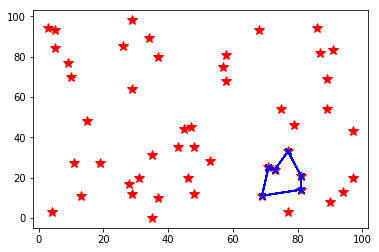

In [24]:
# Code for T3Q2
import time

class differential_algorithm():
    def __init__(self, p_pool, p_size, n_cities):
        self.pop_pool = p_pool
        self.pop_size = p_size
        self.cities_number = n_cities
        self.tour = None
        self.F = 0.5        # F is a real-valued factor in the range (0.0, 2]
        self.cr = 0.07     # CR is a real-valued crossover constant in the range [0.0,1.0]
    
    # mutation part
    def mutation(self, count):
        # Randomly choose three routes for differential claculation
        index_num = np.arange(0, self.pop_size, 1)
        choose = random.sample(list(index_num), 3)
        
        # Do the calculation: temp_new = x1 + F*(x2 - x3)
        temp_new = self.pop_pool[choose[0]]+self.F*(self.pop_pool[choose[1]]-self.pop_pool[choose[2]])
        temp_new  = np.argsort(temp_new)
        return temp_new 
            
    def crossover(self, number, temp):
        new = np.ones((1, self.cities_number))*100
        list_index = []
        
        # For each city in the one route
        for j in range(self.cities_number):
            rand_num = random.random()
            # Randomly select a number from [0, 1], if the rand number is smaller than "crossover probability",
            # take the value from "temp_new" in mutation part
            if (rand_num < self.cr):
                new[0][j] = temp[j]
            # Otherwise, take the value from previous route
            else:
                list_index.append(j)
                
        # To avoid repeated value in a route
        not_repeat = [x for x in self.pop_pool[number] if x not in new]
        for k in range(len(list_index)):
            new[0][list_index[k]] = not_repeat[k]

        return new

#Main function (time start)
start_time = time.time()

num_cities = 50
pop_size = 80     # population size
num_stops = 50
iterations = 10000

# Initialize salesman problem
salesman = traveling_salesman(num_cities) # initialize the TS's world with 50 cities
# Initialize population and population distance
population_pool = np.zeros((pop_size, num_stops))
route_distance = np.zeros(pop_size)

# Randomly generate a numbers of routes, calculate their distance
for i in range(pop_size):
    population_pool[i] = salesman.random_tour(num_stops)
    route_distance[i] = salesman.tour_length()

for i in range(iterations):
    differential_alg = differential_algorithm(population_pool, pop_size, num_cities)
    
    # For every route in population pool, do mutation and crossover
    for k in range(pop_size):
        temp = differential_alg.mutation(k)
        new = differential_alg.crossover(k, temp)
        temp_new = new.flatten().tolist()
        
        salesman.new_tour(tour = temp_new)
        temp_dis = salesman.tour_length()
        
        # If the new one is better, replace the previous one with the new one. Otherwise, don't change it.
        if (temp_dis < route_distance[k]):
            population_pool[k] = new
            route_distance[k] = temp_dis

print("--- %s seconds ---" % (time.time() - start_time))

# Find the minimized 50-city route in whole population
min_route_index = np.argmin(route_distance)
DE_mintour_50 = population_pool[min_route_index]

# Check every 6-city route in minimized 50-city route
min_dedis_6 = 150
for i in range(num_stops-6):
    DE_route_6 = DE_mintour_50[i: i+6]
    salesman.new_tour(tour = DE_route_6)
    de_dis_6 = salesman.tour_length()
    
    if (de_dis_6 < min_dedis_6):
        min_dedis_6 = de_dis_6
        min_de_route_6 = DE_mintour_50[i: i+6]

salesman.new_tour(tour = min_de_route_6) 
de_min_route = list(map(int, min_de_route_6))
print("The best route of 6 cities: ", de_min_route)
print("The minimum distance of 6 cities: ",  min_dedis_6)
salesman.plot()

*__Tuning process for Differential evolution__*<br/>
<ul>(1) Decide the population size:<br/>
Population size is tested from 20 to 80. Here is the table of different testing size. It is obvious that large size of population takes more time, but we will also getting good result from a larger size.<br/>
</ul>
<table>
<tr>
<th>pop size</th>
<th>time</th>
<th>min value</th>
</tr>
<tr>
<td>20</td>
<td>81s</td>
<td>81</td>
</tr>
<tr>
<td>40</td>
<td>161s</td>
<td>77</td>
</tr>
<tr>
<td>60</td>
<td>243s</td>
<td>68</td>
</tr>
<tr>
<td bgcolor=orange>80</td>
<td bgcolor=orange>323s</td>
<td bgcolor=orange>58</td>
</tr>
</table>
<ul>(2) F value: F is a real-valued factor in the range (0.0, 2]
</ul>
<table>
<tr>
<th>F value</th>
<th>time</th>
<th>min value</th>
</tr>
<tr>
<td bgcolor=orange>0.5</td>
<td bgcolor=orange>323s</td>
<td bgcolor=orange>58</td>
</tr>
<tr>
<td>1</td>
<td>333s</td>
<td>68</td>
</tr>
<tr>
<td>1.5</td>
<td>335s</td>
<td>68</td>
</tr>
<tr>
<td>2</td>
<td>312s</td>
<td>67</td>
</tr>
</table>
<ul>(3) cr value(cross over probability): CR is a real-valued crossover constant in the range [0.0,1.0]
</ul>
<table>
<tr>
<th>cr value</th>
<th>time</th>
<th>min value</th>
</tr>
<tr>
<td bgcolor=orange>0.07</td>
<td bgcolor=orange>323s</td>
<td bgcolor=orange>58</td>
</tr>
<tr>
<td>0.1</td>
<td>369s</td>
<td>81</td>
</tr>
<tr>
<td>0.4</td>
<td>375s</td>
<td>115</td>
</tr>
<tr>
<td>0.7</td>
<td>350s</td>
<td>140</td>
</tr>
 <tr>
<td>1.0</td>
<td>356s</td>
<td>130</td>
</tr>
</table>
<ul>(4) Change the iteration number: 
</ul>
<table>
<tr>
<th>iterations</th>
<th>time</th>
<th>min value</th>
</tr>
<tr>
<td>2000</td>
<td>65s</td>
<td>84</td>
</tr>
<tr>
<td>5000</td>
<td>168s</td>
<td>77</td>
</tr>
<tr>
<td bgcolor=orange>10000</td>
<td bgcolor=orange>330s</td>
<td bgcolor=orange>58</td>
</tr>
<tr>
<td>15000</td>
<td>487s</td>
<td>58</td>
</tr>
</table>
<ul>(5) Conclusion: population size = 80, F value = 0.5, cr value = 0.07, iterations = 10000

<h2> Task 4: Comparison (20) </h2>
<ul>
Run all four search methods on the same traveling saleman, searching for the best 6-city loop of a 50 city selection. <br>
Make sure you run all optimization methods on the same initialization with the same city locations! <br>
Compare the performances of all four algorithms against each other. <br>
Consider factors such as walltime, iteration efficiency, result quality, consistence and ease of implementation. <br>
How well does this match up with the expected performance, what if anything did you find surprising? <br>
</ul>

*__T4 Question__*
<table>
<tr>
<th rowspan="1"></th>
<th>Exhausted</th>
<th>Random</th>
<th>Genetic</th>
<th>Differential</th>
</tr>
<tr>
<th rowspan="1">time</th>
<td>193118s</td>
<td>246s</td>
<td>13s</td>
<td>330s</td>
</tr>
<tr>
<th rowspan="1">min value</th>
<td>52</td>
<td>58</td>
<td>54</td>
<td>58</td>
</tr>
</table>

(1)<li>From the results, genetic algorithm seems to be the best algorithm for this problem, since it takes few seconds and get a really good result, 54.<br><li>Exhausted search is a way to get the exact optimized result, but it also takes time depends on the size of search space. From the table above, it is obvious not a good method for TSP problem comparing to other algorithms. Overall, it's not a smart way to use exhausted search for a huge search space.<br><li>Random search is a method that is a little better than exhausted search, it will find a value that is really close to the exact minimum value, but still takes a little bit of time depending on how large our sampling space is.<br><li>From my implement, differential evolution didn't work well in this problem, it takes more time random search to get a good result.<br><li>On another note, random algorithm is the easiest algorithm to implement, it just takes few minutes. Exhausted search is also easy to implement using the python package "itertools". Genetic algorithm and Differential evolution is absolutely the hardest algorithm to implement, when doing crossover and mutation part, we need to deel with repeated cities, avoid same city appears in one route. Also, the performance of the optimized value is depend on parameter tuning, if not using good parameters, the whole process will take lots of time and also get a bad value.<br>
(2)<li>The expected performance is just what I expected for exhausted search and random search, just like the performance in assignment one.<br><li>The performance for genetic algorithm is beyond my expectations. This is an algorithm using evolution from biological gene, it doesn't use any mathematical derivation in the whole process. It's really surprise to get a good result from this algorithm.<br><li>The performance for differential evolution didn't work quite well. From my knowledge, differential evolution is usually use on a continues space problem, since we use the calculation v = x1 + F*(x2 - x3). However, TSP problem is a discrete space problem. Thus, we need to process float number to integer value. This process will vary from different methods, and will also give different performance.